In [45]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

print(tf.__version__)

2.9.1


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 0us/step


In [42]:
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

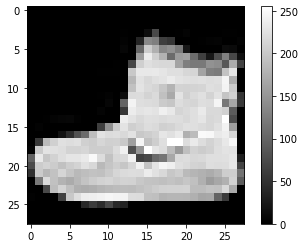

In [30]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [33]:
train_images = train_images / 255.0

test_images = test_images / 255.0

## This is showing the training set

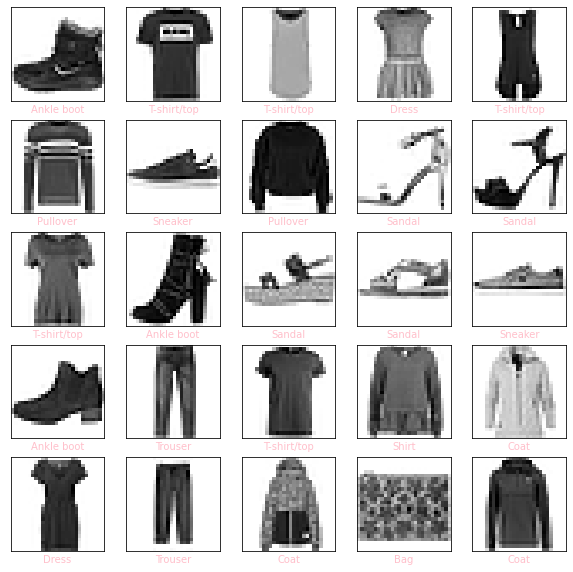

In [38]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]], color='pink')
plt.show()

## Building the model 

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

## Compile the model 

In [50]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the Model

In [51]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4979 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3734 - accuracy: 0.8654
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3373 - accuracy: 0.8759
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3132 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2948 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2817 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2679 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2584 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2471 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.241

## Evaluate the test accuracy

In [53]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

313/313 - 0s - loss: 0.3310 - accuracy: 0.8855 - 473ms/epoch - 2ms/step

Test accuracy: 0.8855000138282776

Test loss: 0.33098503947257996


## Make Predictions 

In [55]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [56]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [59]:
predictions[0]

array([9.8277255e-08, 2.6453083e-08, 2.2161728e-08, 1.2798195e-08,
       1.2991714e-07, 1.1809862e-03, 8.8518433e-08, 1.8186638e-02,
       3.1210220e-08, 9.8063207e-01], dtype=float32)

In [60]:
np.argmax(predictions[0])

9

## plotting functions 

In [88]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks(range(100))
  #plt.yticks(plt.yticks()[0], ['{:,.0%}'.format(x) for x in plt.yticks()[0]])


  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  #plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

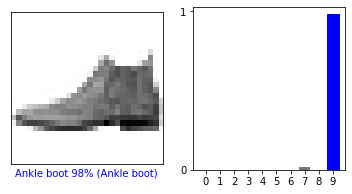

In [89]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

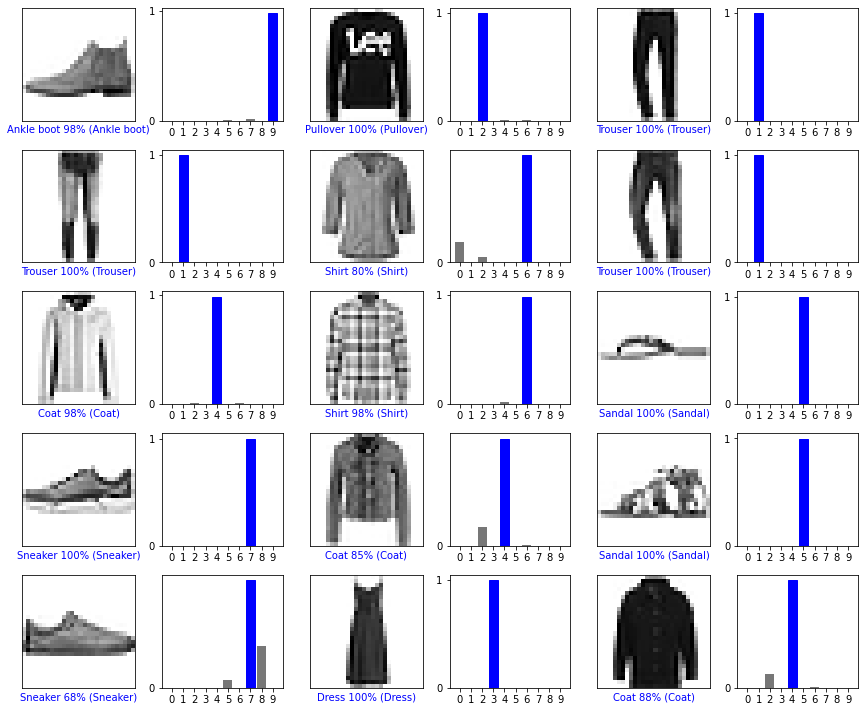

In [92]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained Model

In [93]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [94]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [95]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 24ms/step
[[5.9633339e-06 5.0087681e-14 9.9830449e-01 1.7440681e-10 5.1597727e-04
  6.8498514e-12 1.1734794e-03 6.5252356e-20 1.1097543e-10 1.1357841e-16]]


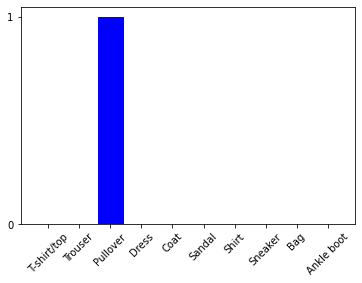

In [96]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [97]:
np.argmax(predictions_single[0])

2